In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('./DataSets/multiple_linear_regression.csv')

df.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Preprocessing

In [4]:
df.isna().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

## Spliting the data

In [5]:
x = np.array(df.iloc[:,:3])
y = np.array(df.iloc[:,3])

x

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

x_test.shape

(60, 3)

In [7]:
x_train.shape

(140, 3)

## Linear Regression Model

In [8]:
model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

## Error Analysis

In [9]:
mean_squared_error(y_pred, y_test)

3.7967972367152227

## Visualization

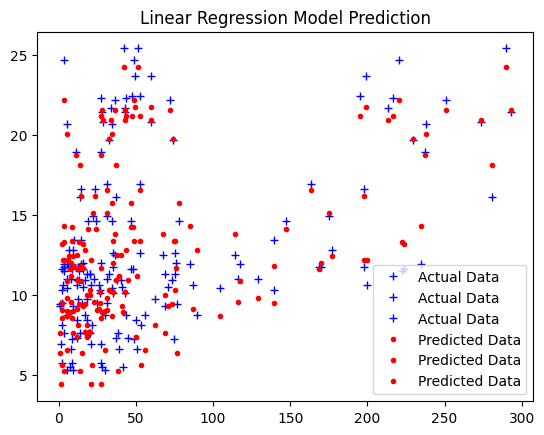

In [10]:
plt.plot(x_test, y_test, "+", color="blue", label="Actual Data")
plt.plot(x_test, y_pred, ".", color="red", label="Predicted Data")
plt.title("Linear Regression Model Prediction")
plt.legend()
plt.show()

## Linear Regression Property Validation

**Homosedasity**

In [11]:
prediction = y_pred
residual = y_pred - y_test

residual

array([-0.3346037 , -1.21177208,  0.15107058,  3.58923816, -2.49768012,
        0.75556872, -1.10307498, -1.04971477,  1.77547079,  0.22449511,
       -0.48556974, -2.17457175,  2.40205991,  3.67026042, -0.84320424,
        0.30454351,  3.41549403, -0.44380749, -1.00417117, -0.17526447,
        0.06821818,  1.27469028,  1.59638908, -0.66498238, -1.69139259,
       -2.4880199 , -0.78240517, -1.59372335, -1.51923363,  2.81412012,
        1.57604891, -1.3308061 , -1.96991044,  4.07770578,  2.0011362 ,
       -0.62409204,  2.66202556,  0.13826535, -1.06061173, -2.51809393,
       -1.48667594, -0.39513676,  0.07045434, -1.60918637,  1.56388427,
       -2.3756448 , -1.21106167, -0.50669281, -1.70975503, -0.33880237,
        1.11848432, -0.06843138,  6.15360735,  4.5531472 , -3.06363155,
       -1.23842046, -1.4804286 , -1.14483454,  0.09519137,  0.45317572])

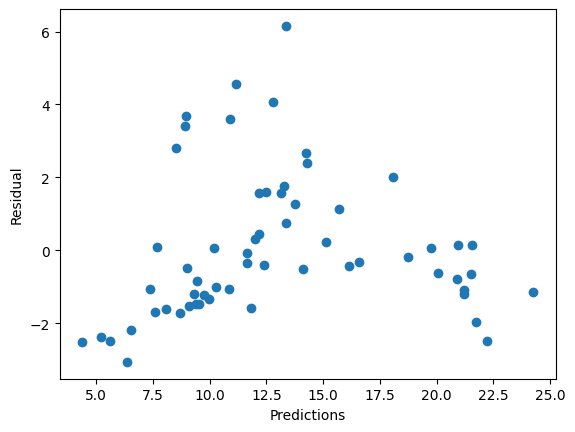

In [13]:
plt.scatter(prediction, residual)
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

**Normality in Residual**

C:\Users\Subhadeep_Sarkar\AppData\Local\Temp\ipykernel_11788\121899862.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual).set_title("Distribution Of Residual")


Text(0.5, 1.0, 'Distribution Of Residual')

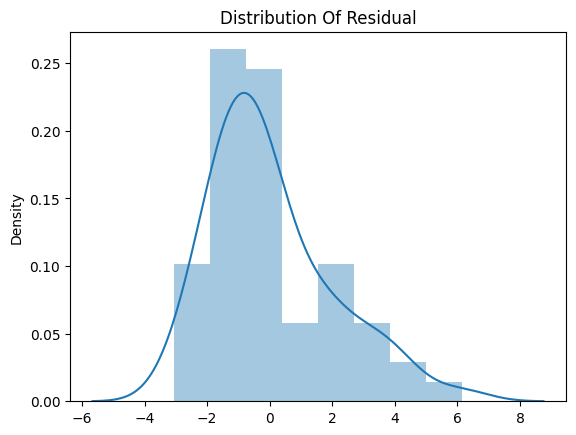

In [18]:
import seaborn as sns

sns.distplot(residual).set_title("Distribution Of Residual")

## Ordinary Least Square (OLS) Method

In [20]:
import statsmodels.api as sm

x_with_const = sm.add_constant(x_train)

x_with_const

array([[  1. , 284.3,  10.6,   6.4],
       [  1. , 184.9,  21. ,  22. ],
       [  1. , 112.9,  17.4,  38.6],
       [  1. ,  23.8,  35.1,  65.9],
       [  1. , 290.7,   4.1,   8.5],
       [  1. ,  19.4,  16. ,  22.3],
       [  1. , 293.6,  27.7,   1.8],
       [  1. ,  18.7,  12.1,  23.4],
       [  1. , 134.3,   4.9,   9.3],
       [  1. ,  25.6,  39. ,   9.3],
       [  1. , 100.4,   9.6,   3.6],
       [  1. ,  80.2,   0. ,   9.2],
       [  1. , 188.4,  18.1,  25.6],
       [  1. , 177. ,  33.4,  38.7],
       [  1. , 125.7,  36.9,  79.2],
       [  1. , 209.6,  20.6,  10.7],
       [  1. , 142.9,  29.3,  12.6],
       [  1. , 184.9,  43.9,   1.7],
       [  1. , 222.4,   4.3,  49.8],
       [  1. , 241.7,  38. ,  23.2],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 120.5,  28.5,  14.2],
       [  1. ,  89.7,   9.9,  35.7],
       [  1. , 191.1,  28.7,  18.2],
       [  1. ,  75.5,  10.8,   6. ],
       [  1. , 193.2,  18.4,  65.7],
       [  1. ,  85.7,  35.8,  49.3],
 

In [21]:
ols = sm.OLS(y_train, x_with_const)

result = ols.fit()

result.params

array([2.70894909, 0.04405928, 0.1992875 , 0.00688245])

In [24]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.5
Date:                Sat, 03 Feb 2024   Prob (F-statistic):           1.88e-69
Time:                        15:15:58   Log-Likelihood:                -262.21
No. Observations:                 140   AIC:                             532.4
Df Residuals:                     136   BIC:                             544.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7089      0.374      7.250      0.0

**Prediction**

In [25]:
x_test = sm.add_constant(x_test)

y_pred = result.predict(x_test)

print(y_pred)

[16.5653963  21.18822792 21.55107058 10.88923816 22.20231988 13.35556872
 21.19692502  7.35028523 13.27547079 15.12449511  9.01443026  6.52542825
 14.30205991  8.97026042  9.45679576 12.00454351  8.91549403 16.15619251
 10.29582883 18.72473553 19.76821818 13.77469028 12.49638908 21.53501762
  7.60860741  5.6119801  20.91759483 11.80627665  9.08076637  8.51412012
 12.17604891  9.9691939  21.73008956 12.77770578 18.1011362  20.07590796
 14.26202556 20.93826535 10.83938827  4.38190607  9.51332406 12.40486324
 10.17045434  8.09081363 13.16388427  5.2243552   9.28893833 14.09330719
  8.69024497 11.66119763 15.71848432 11.63156862 13.35360735 11.1531472
  6.33636845  9.76157954  9.4195714  24.25516546  7.69519137 12.15317572]


In [26]:
mean_squared_error(y_pred, y_test)

3.796797236715215